In [1]:
### 2018/3/28 米沢諭史 勉強会資料 

### セットアップ

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
from IPython.display import display
%matplotlib inline
import graphviz


## Supervised Learning
### Classification and Regression

X.shape: (26, 2)


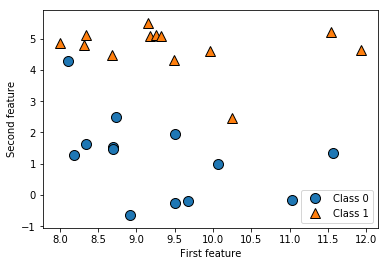

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

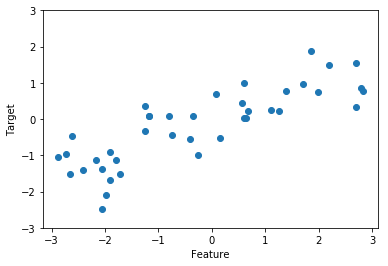

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [7]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [8]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### k-Nearest Neighbor
#### k-Neighbors Classification

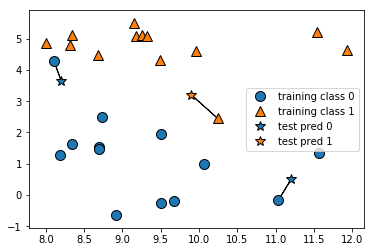

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

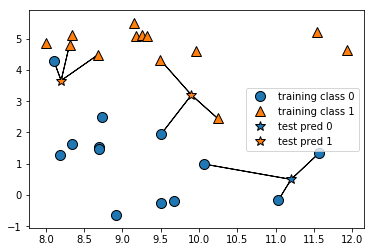

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [16]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [17]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


##### Analyzing KNeighborsClassifier

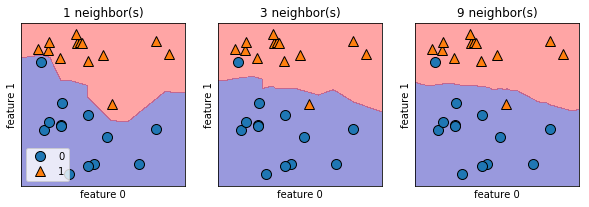

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

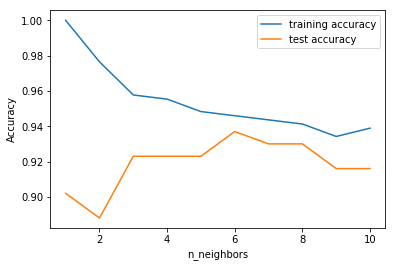

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### k-Neighbors Regression

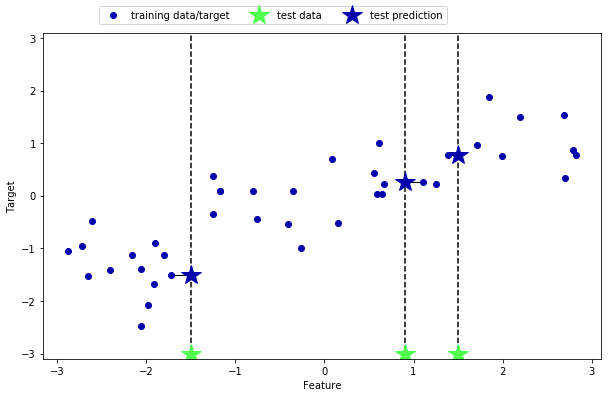

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

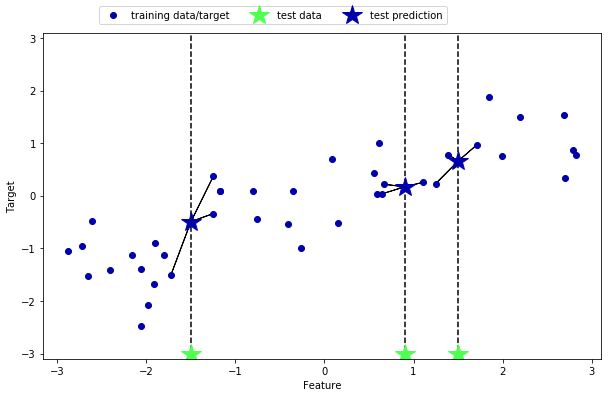

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [23]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [24]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analyzing KNeighborsRegressor

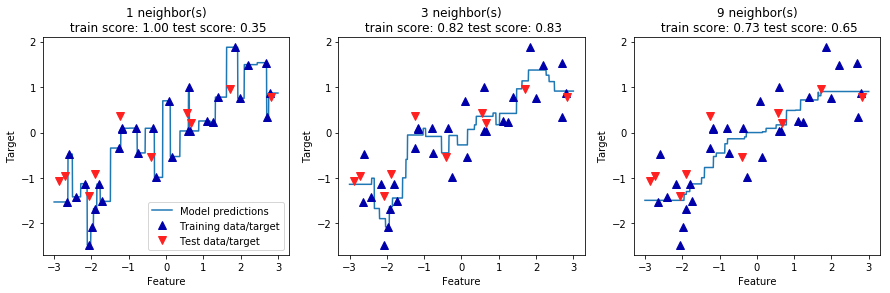

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

##### Strengths, weaknesses, and parameters

#### Linear Models
##### Linear models for regression
\begin{align*}
\end{align*}

w[0]: 0.393906  b: -0.031804


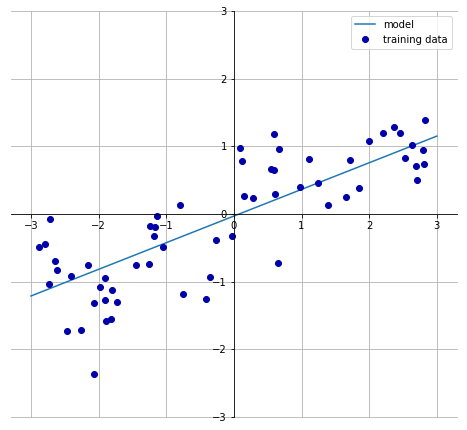

In [26]:
mglearn.plots.plot_linear_regression_wave()

#### Linear Regression aka Ordinary Least Squares

In [27]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [29]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [30]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [31]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


##### Ridge regression

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [33]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


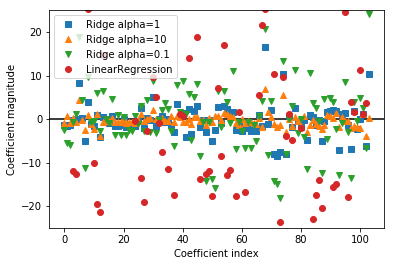

In [35]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

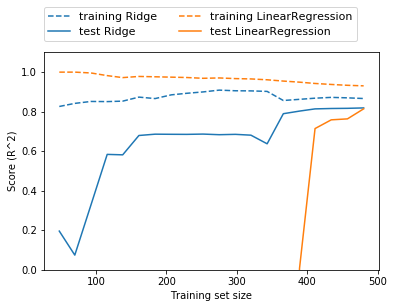

In [36]:
mglearn.plots.plot_ridge_n_samples()

##### Lasso

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [38]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [39]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


Text(0,0.5,'Coefficient magnitude')

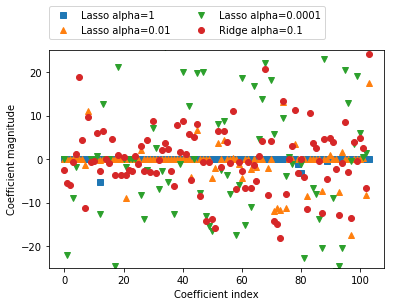

In [40]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

#### Linear models for Classification

\begin{align*}
\end{align*}

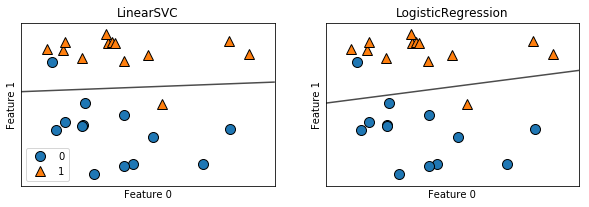

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

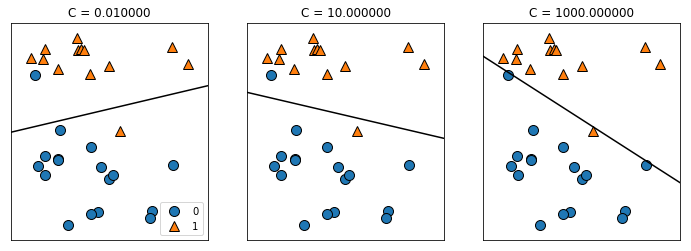

In [42]:
mglearn.plots.plot_linear_svc_regularization()

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


In [44]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [45]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


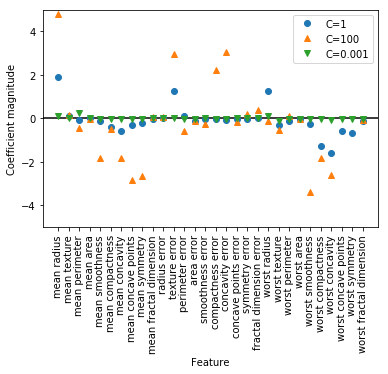

In [46]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


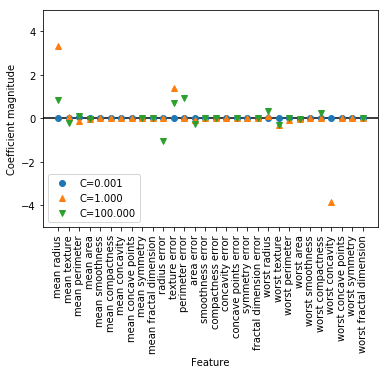

In [47]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### Linear models for multiclass classification
\begin{align*}
\end{align*}

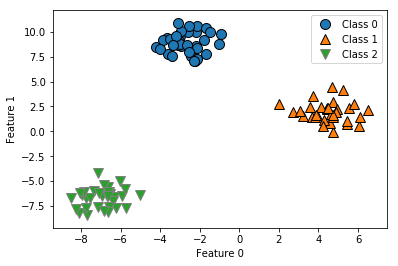

In [48]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [49]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


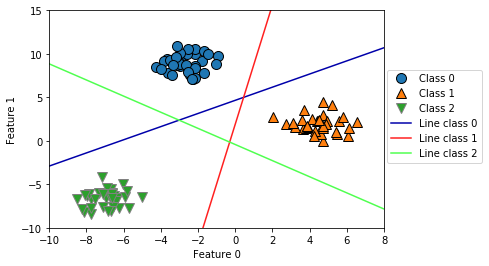

In [50]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0,0.5,'Feature 1')

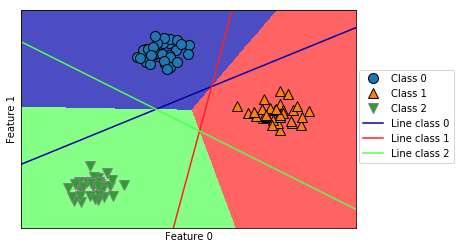

In [51]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses and parameters

In [52]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

In [53]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [54]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

### Naive Bayes Classifiers

In [55]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [56]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### Strengths, weaknesses and parameters

## 2.3.5 Decision trees　決定木（分類）

決定木とは木構造を用いてデータを分類する。
以下の図表で示されているようににYes/No（True or Falese）で答えられる質問に答える形でデータを分類する。

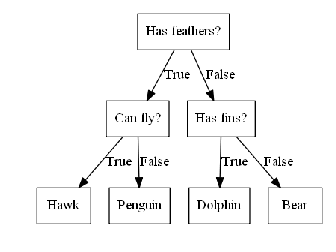

In [57]:
mglearn.plots.plot_animal_tree()

上記の例では４頭の動物（鷹、ペンギン、イルカ、クマ）を３つの特徴量（羽毛はあるか、飛べるか、ヒレはあるか）で識別するモデルを作ったことになる。

#### [重要] mglearnでのツリー形式の図の描写をするためには、pythonの設定が必要となる。設定方法は以下のとおり（Windows版）。
##### コマンドプロンプト上での操作
1. pip install graphviz
2. conda install graphviz
3. dot -V　で　graphvizのバージョンが表示されればOK
4. pip install pydotplus
5. conda install pydotplus
6. where dot で保存場所を確認　　・・・・★１

#### http://www.graphviz.org/からgraphviz本体のダウンロード
1. Downloadタブ押下
2. Stable 2.38 Windows install packagesを押下
3. graphviz-2.38.msiを押下し、インストールツールをダウンロード

#### graphviz-2.38.msiのインストール
1. インストールツールの指示に従ってインストールする。
    インストールした場所はメモ。　・・・・★２

#### Pathを通す
1. PCの「システムとプロパティ」から「環境変数」を押下
2. 「システム環境変数」のPathに★１、２の絶対参照パスを入力する。
    

#### 2.3.5.1 決定木の構築

下の図表は、決定木の分類プロセスを示している。<br>
分類したいサンプルは青〇と橙△の各50点<br>

決定木は、情報利得が最大となる特徴量でデータを分割し、木を成長させていく。
情報利得を以下のとおり定義する。

$ IG(D_{p},f) = I(D_p)- \frac{N_{left}}{N_p}I(D_{left})- \frac{N_{right}}{N_p}I(D_{right})$

I:不純度を数値化<br>
$D_p$：親ノードのデータセット<br>
$D_{right}$、$D_{left}$：$j$番目の子ノードのデータセット<br>
$N_p$：親ノードのサンプルの総数<br>
$N_{right}$、$N_{left}$：$j$番目の子ノードのサンプル数<br>

決定木の不純度の指標には
1. ジニ不純度
2. エントロピー
3. 分類誤差

がある。今回は、一般的によく使われるジニ不純度について説明する。

$I_{gini}(t) = \sum_{i=1}^{2}{p(i|t)(1-p(i|t))}= 1 - \sum_{i=1}^{2}{p(i|t)^2}$

$p(i|t)$:特定のノード$t$においてクラス$i$に属するサンプルの割合

***
ジニ不純度の計算例
（ｘ、ｙ）＝（40、40）の分割を考える。
Aパターンは（30、10）、（10、30）に分割
Bパターンは（20、40）、（20、0）に分割する。

親ノードの不純度<br>
$I_{G}(D_{P}) = 1 - (0.5^2 + 0.5^2)=0.5$<br>

シナリオA：左の子ノードの不純度<br>
$I_{G}(D_{left}) = 1 - ((\frac{3}{4})^2 + (\frac{1}{4})^2)=\frac{3}{8}=0.375$<br>
シナリオA：右の子ノードの不純度<br>
$I_{G}(D_{right}) = 1 - ((\frac{1}{4})^2 + (\frac{3}{4})^2)=\frac{3}{8}=0.375$<br>
シナリオAの情報利得<br>
$IG_{G} = 0.5 - \frac{4}{8} \times 0.375 - \frac{4}{8} \times 0.375 = 0.125$<br>

シナリオB：左の子ノードの不純度<br>
$I_{G}(D_{left}) = 1 - ((\frac{2}{6})^2 + (\frac{4}{6})^2)=\frac{4}{9}=0.4$<br>
シナリオB：右の子ノードの不純度<br>
$I_{G}(D_{right}) = 1 - ((\frac{2}{2})^2 + (\frac{0}{2})^2)=0$<br>
シナリオBの情報利得<br>
$IG_{G} = 0.5 - \frac{6}{8} \times 0.4 - \frac{2}{8} \times 0 = 0.16$<br>

したがって、シナリオBの分割を優先することとなる。




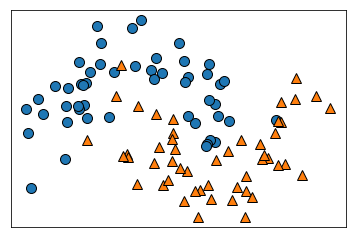

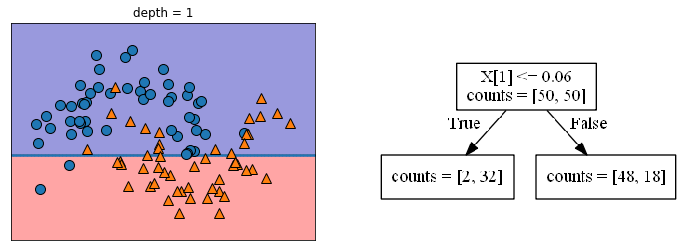

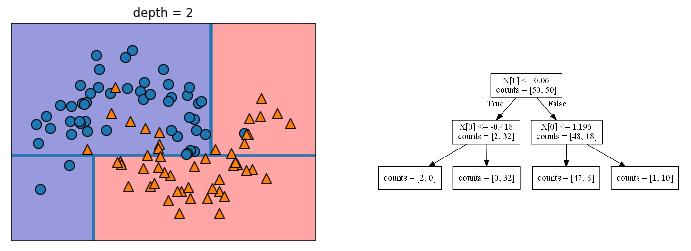

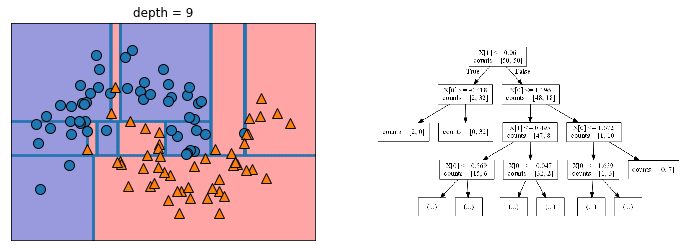

In [121]:
mglearn.plots.plot_tree_progressive()

##### 2.3.5.2 決定木の複雑さの制御（剪定作業）

サンプルがユニークに分類できるまで分類（純粋）すると、木は大きくなりすぎて、モデルが複雑になる。
機械学習で問題となる過剰適合に陥る。

---
【参考】29頁 2.2 汎化、過剰適合、適合不足<br>
　教師あり学習では、訓練データに基づいてモデルを構築し、それを用いて、使った訓練データと同じ性質を持つ、未見のデータに対して正確な予測ができるようにしたい。モデルが未見のデータに対して正確に予測ができるなら、汎化能力が高いということができる。<br>
　逆に、訓練データに対して過度に適合しすぎるモデルを作成すると、訓練データに対してはうまく機能するが、未見のデータには汎化できないモデルとなってしまう。これを過剰適合という。

--- 

過剰適合の防止方法
1. 事前枝刈り：木の深さを制限する方法、葉の最大値を制限する方法
2. 事後枝刈り：一度大きな木を構築してから、情報量の少ない特徴量を削除する方法

Pythonの機械学習パッケージ（Scikit-learn）では事前枝刈しか実装されていない

#### 事前枝刈なしバージョン

In [59]:
from sklearn.tree import DecisionTreeClassifier
# Scikit-learnのtreeパッケージから決定木の分類クラスの呼び出し
cancer = load_breast_cancer() 
#インストールされている癌のデータを配列に格納
#[Tips]Pythonは変数の型が数値なのか、文字列なのかを自動で判定してくれる

#cancerデータとは、がん検診患者の診断情報30個を特徴量に、対象患者がガンであるか否かを教師ラベルとして持つデータです。
#print(cancer.keys()) 
# cancer.targetとは２値診断データ
# 0 : malignant(悪性)
# 1 : benign(良性)
malignant_count = len(np.where(cancer.target==0)[0])
benign_count = len(np.where(cancer.target==1)[0])
print('target data;0:悪性', malignant_count)
print('target data;1:良性', benign_count)

#print(cancer.feature_names)


#データを訓練データとテストデータに分割(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#train_test_splitの引数はググってください。
#引数test.sizeを指定していないためデフォルト値で設定：75%を訓練データ、25％をテストデータとして設定
#random_stateは乱数のシード
#stratifyをcancer.target（0 or 1のデータ）にすることで、０or1のデータからそれぞれ25％と75％に分割してくれる。

#決定木の準備
tree = DecisionTreeClassifier(random_state=0)
# 引数はhttps://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%A7%E6%B1%BA%E5%AE%9A%E6%9C%A8%E5%88%86%E6%9E%90

#訓練データを入れて決定木の学習の開始
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
#訓練データでの適合度
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
#テストデータ（未見データ）での適合度

target data;0:悪性 212
target data;1:良性 357
Accuracy on training set: 1.000
Accuracy on test set: 0.937


#### 事前の枝刈ありバージョン

In [60]:
#引数max_depth=4として、木の深さを固定（事前の枝刈）
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### 2.3.5.3 決定木の解析

上述までの分析結果では、正解率しか出力されていないためより詳細な分析が難しい。
そこで、作成したモデルの木を可視化する。

In [61]:
from sklearn.tree import export_graphviz
# Scikit-learnのtreeパッケージからexport_graphvizクラスの呼び出し

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

#impurity:純度を表示するか否か
#filled:決定木を塗つぶすか否か

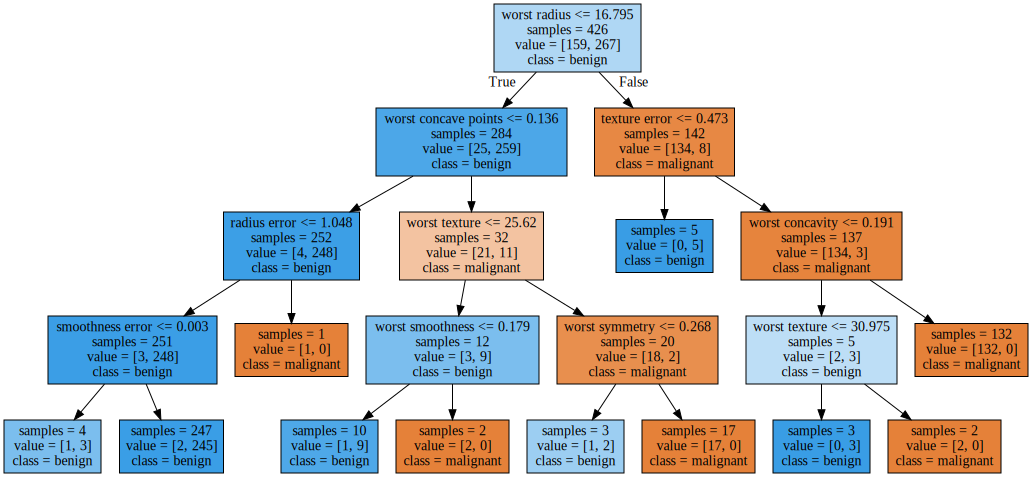

In [62]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 決定木の特徴量の重要性

決定木の挙動を要約する特性値を確認する。決定木の要約で最も使われるものは特徴量の重要度である。<br>
決定木が行う判断にとって、個々の特徴量がどの程度重要かを示す割合である。ちなみに、
特徴量の重要度の和は常に１となる。

In [63]:
print(cancer.feature_names)
print("Feature importances:\n{}".format(tree.feature_importances_))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


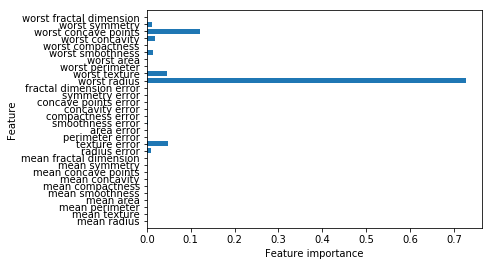

In [64]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

ある特徴量の重要度の値が低いからといって、その特徴量の持つ情報が少ないとは限らない。単にその決定木で採用されなかったというだけである。
特徴量の重要度は常に正であり、特徴量がどのクラスを示しているのかをエンコードしているわけではない。
特徴量の重要度は、サンプルが良性か悪性かを判断する上で、重要だということを教えてくれるが、この値が大きいと良性になるのか悪性になるのかは教えてくれない。


Feature importances: [0. 1.]


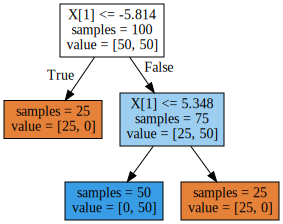

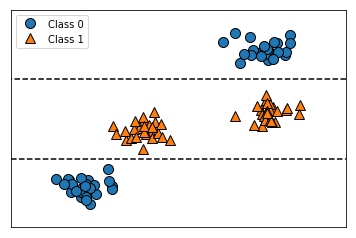

In [65]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

#### 決定木による回帰分析

決定木による回帰も分類と同じことが言える。
ただし、決定木による回帰は訓練データのレンジの外側に対しては予測ができない。
計算機のメモリ（RAM）価格の履歴データセットを使用して例を示す。

Text(0,0.5,'Price in $/Mbyte')

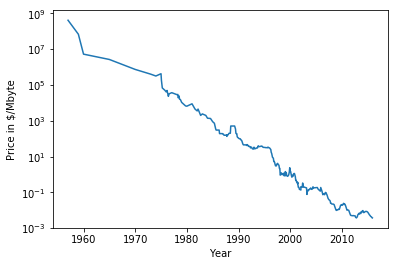

In [66]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
#価格のスケールが対数

#### 線形回帰と決定木による回帰の比較

線形のモデルは、最小二乗法にて直線で近似する。2000年以降のデータに対してかなりよい予測となっている。<br>
一方決定木の方は、訓練データに対しては完全な予測を行う。(事前の枝刈をしていないため、訓練データを完璧に覚えている。)<br>
しかし、モデルが持っていない領域になると、決定木は知っている最後の点を返してくるだけである。

In [67]:
from sklearn.tree import DecisionTreeRegressor
# 過去のデータを用いて2000年以降の価格を予測する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# 日付に基づいて価格を予測
X_train = data_train.date[:, np.newaxis]
# 対数変換
#np =  numpy
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 全ての価格を予測する
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数を逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

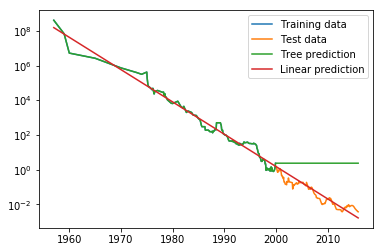

In [68]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

#### 2.3.5.5 長所、短所、パラメータ

決定木の過剰適合を防ぐには、事前の枝刈を指定するDecisionTreeClassifierの引数である
1. max_depth
2. max_leaf_nodes
3. min_sample

のどれかを選択すればよい。

決定木の最大の問題点は、事前の枝刈を行ったとしても、過剰適合しやすく、汎化能力が低い傾向があることである。
そこで、開発されたのが次の節で説明するアンサンブル学習である。

### 2.3.6 決定木のアンサンブル法
アンサンブル法とは、複数の機械学習モデルを組み合わせることで、より協力なモデルを構築する方法である。
ここで紹介する手法は、ランダムフォレストと勾配ブースティング法である。

##### 2.3.6.1 ランダムフォレスト Breiman[2001]
決定木の最大の問題点は訓練データに対して過剰適合してしまうことである。ランダムフォレストはこの問題に対応する一つの方法である。
ランダムフォレストは、少しずつ異なる決定木を沢山集め、その多数決で結果を決める。
個々の決定木は比較的うまく予測できているが、一部のデータに対して過剰適合してしまっているという考え方に基づいている。それぞれ異なった方向に過剰適合した決定木を沢山作れば、その結果の平均を取ることで過剰適合の度合いを減らすことができる。
そのため個々の木がランダムである木を作ることが重要となる。

##### ランダムフォレストの構築
Step1 全体の2/3の学習用データから大きさMのランダムなブートストラップ標本を復元抽出する。
１個のブートストラップ標本の大きさnは、原則として全体の2/3の大きさである。
残りの1/3は評価・検証用データとして残す。これを学習鞄の外に取りおくという意味からOOB（Out of Bag）と呼ぶ。<br>
Step2 各ブートストラップ標本から木を成長させる。各ノードで以下の作業を繰り返す。
1.全変数のうちから d 個の説明変数をランダムに非復元抽出する。
2.情報利得を最大化することにより、最適な分割となる説明変数を使ってノードを分割する。<br>
Step3 得られた各決定木の結果を統合する。分類・判別問題では多数決で、回帰・予測問題では平均値で統合し、学習器を構築する。
OOBに対して、学習用データで構築したモデルを当てはめ推定誤差を求める。分類・判別問題では誤判別率、回帰・予測では平均二乗誤差を指標とする。この推定誤差から説明変数の重要度を求めることができる。


【参考】ブートストラップ法
重複を許して、指定した標本の大きさn個になるまで繰り返す。

#### ランダムフォレストの解析

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
#分析用データの作成
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
#ランダムフォレストの学習
forest = RandomForestClassifier(n_estimators=5, random_state=2)
#n_estimators: 決定木の数(デフォルトは10)を設定

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

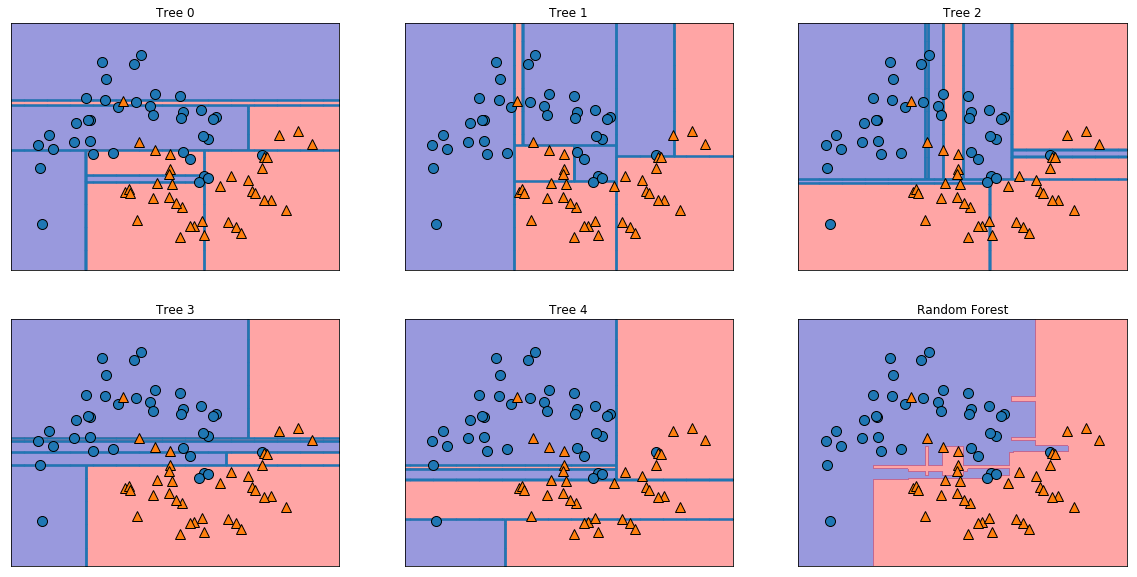

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


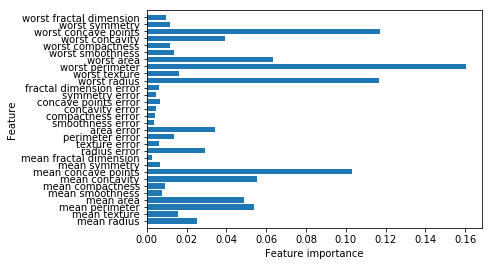

In [72]:
#重要度
plot_feature_importances_cancer(forest)

###### Strengths, weaknesses, and parameters

### 2.3.6.2 勾配ブースティングマシン
勾配ブースティングマシンは、ランダムフォレストと対象的に、１つ前の決定木の誤りを次の決定木が修正するようにして、決定木を順番に作っていく。
したがって、並列処理ができず、時間がかかるものの、正答率は高い。

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
#デフォルトでは、深さ３の決定木が100本、誤差許容率を0.1として作られる
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [74]:
#木の深さを強制的に１にして事前の枝刈を強力にする。
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [75]:
#誤差許容率を0.01程度に下げる
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


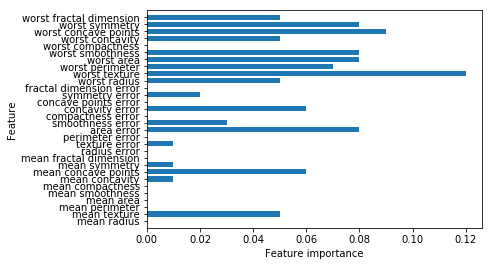

In [76]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

#### 2.3.7 カーネル法を用いたサポートベクターマシン
線形サポートベクタマシンを用いたクラス分類は2.3.5.5で既出のため、基本的なサポートベクターマシンの考え方は省略する。

次のデータの分離を考える。

Text(0,0.5,'Feature 1')

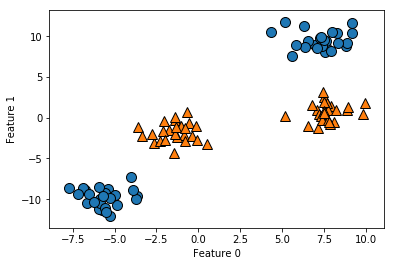

In [77]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### 線形サポートベクターマシンによる分離

Text(0,0.5,'Feature 1')

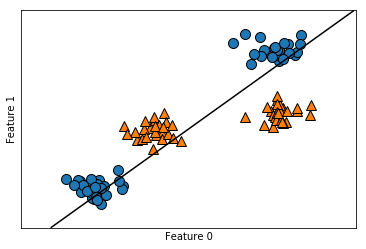

In [78]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 入力特徴量の拡張
y軸（Feature１）の２乗を追加し、３次元のデータとする（射影）。<br>
この新しい表現では２つのクラスを線形モデルで、つまり３次元空間内の平面を用いて分離することが可能となる。

Text(0.5,0,'feature1 ** 2')

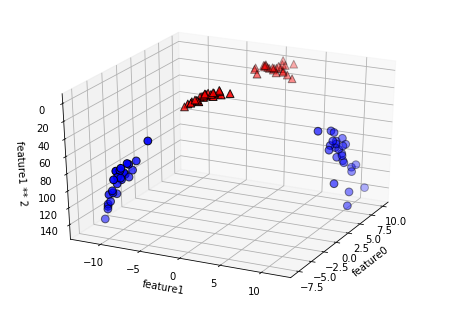

In [79]:
#２番目の特徴量の２乗を追加する
#hstack：列を結合する。
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# ３Dで可視化する。
ax = Axes3D(figure, elev=-152, azim=-26)
# y== 0 点をプロットしてからy == 1点をプロットする。
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

#### 3次元平面上に線形のサポートベクタマシンを適用する。

Text(0.5,0,'feature1 ** 2')

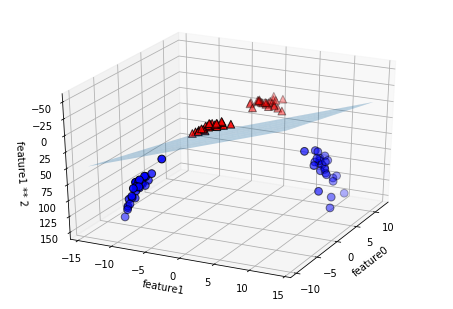

In [80]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

もとの特徴量の関数としてみると、線形サポートベクターマシンは線形分離ではなくなっている。

Text(0,0.5,'Feature 1')

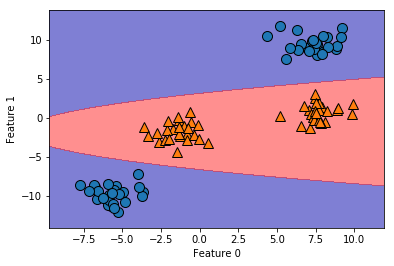

In [81]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 2.3.7.2 カーネルトリック

非線形の特徴量をデータに追加（今回は$x^2$）することで、線形サポートベクタマシーンが強力となる。
しかし、射影した後に、サポートベクトル同士の距離（ドット積）を２次計画法によって解を求めるためには計算コストがかかり、大規模なデータでは計算が困難となる。そこで、「カーネルトリック」を行う。
「カーネルトリック」とは、射影した後に、サポートベクトル同士の距離を２次計画法によって解を求めるのではなく、
射影した後に、カーネルを計算する。

サポートベクタマシンで広く用いられている高次元空間へのマップ方法（カーネルトリック）には二つある。
1. 多項カーネル
2. 放射基底関数（Radial basis function:RBF)　別名：ガウシアンカーネル（次に詳細について述べる。）

#### 2.3.7.3 サポートベクタマシンを理解する
サポートベクターマシンは、２つのクラスの境界に位置するごく一部の訓練データポイントだけが決定境界を決定する。
これらのデータポイントをサポートベクタと呼ぶ。

新しいデータポイントに対して予測を行う際に、サポートベクタとデータポイントとの距離が測定される。
クラス分類には、このサポートベクタとの距離と、訓練課程で学習された個々のサポートベクタの重要性によって決定される。

データポイント間の距離は次のとおり定義されるガウシアンカーネルで測られる。

$ k_{rbf}(x_{1},y_{1}) = \exp ( - \frac{\parallel x_{1} - y_{1} \parallel ^2}{2\sigma^2} ) $

$ k_{rbf}(x_{1},y_{1}) = \exp ( -\gamma \parallel x_{1} - y_{1} \parallel ^2 ) $<br>
ただし、$\gamma = \frac{1}{2\sigma^2}$とする。

$x_{1}$、$y_{1}$ : データポイント<br>
$\parallel x_{1} - y_{1} \parallel$：ユークリッド距離<br>
$\gamma$：ガウシアンカーネルの幅を制御するパラメータ<br>

---
【参考】<br>
「カーネル」という用語については、２つのサンプル間での「類似性を表す関数」であると解釈できる。
マイナスの記号を付けているのは、距離の指標を反転させて類似度にするためである。
指数関数のべき乗部分が０から無限大の値をとることによる、結果として得られる類似度は１（まったく同じサンプル）から
０（まったく異なるサンプル）の範囲に収まる。<br>

---

非線形サポートベクタマシンを実施した結果を下図表に示す。
サポートベクタを縁取りした点で示す。

Text(0,0.5,'Feature 1')

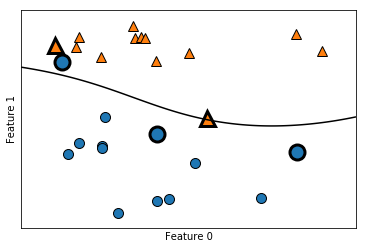

In [82]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 2.3.7.4 サポートベクタマシーンパラメータの調整

gammaパラメータは、ガウシアンカーネルの幅を調整<br>
→点が近いということを意味するスケールを決定する。<br>
1. gammaが小さいとガウシアンカーネルの直径が大きくなり、多くの点が近いと判断するようになる。（簡単なモデル）<br>
2. gammaが大きいとガウシアンカーネルの直径が大きくなり、個々のデータポイントをより重要視する。（複雑なモデル）<br>

Cパラメータは、正則化パラメータ
→個々のデータポイントの重要度を制限する。
1. Cパラメータが小さいと個々のデータポイントに与える影響は限定的（誤分類に対するペナルティが小さい）
2. Cパラメータが大きいと個々のデータポイントに与える影響が大きい（誤分類に対するペナルティが大きい）

これらのパラメータを変化させた結果を下図表に示す。

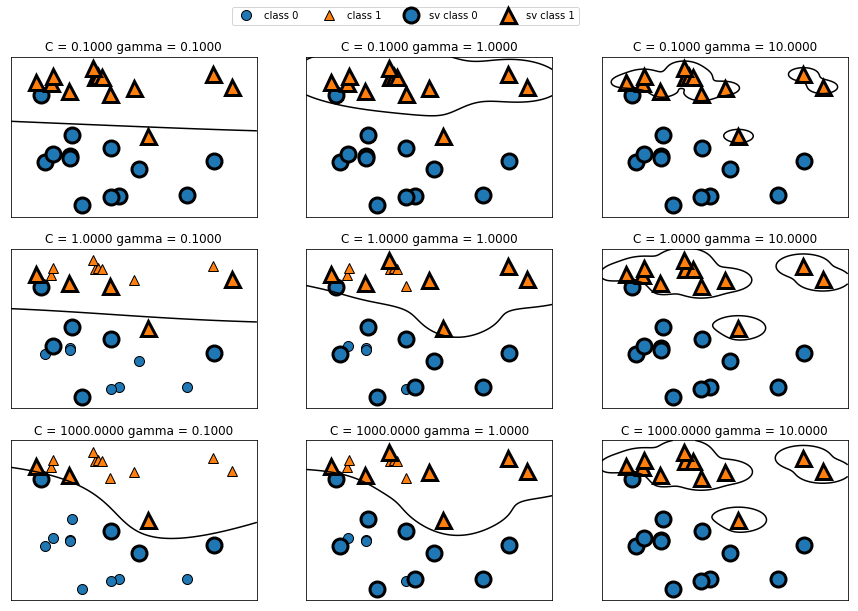

In [83]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

#### 特徴量を変換せずに純粋にCancerデータに非線形サポートベクタマシンを適用した例
訓練データセットに対しては100%の精度であるが、テストデータセットでは63％と精度が低い。<br>
このことから、強く過剰適合していることが分かる。

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


特徴量の最大値と最小値を対数変換してプロットしたものを確認する。
30個の特徴量が相互に桁違いにサイスが違うことが分かり、サポートベクタマシンに深刻な影響を与えている。

Text(0,0.5,'Feature magnitude')

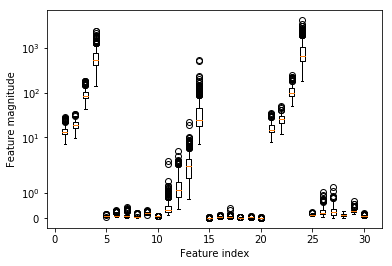

In [85]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### 2.3.7.5 サポートベクタマシーンのためのデータの前処理
サポートベクタマシンでよく使われる方法は、全ての特徴量が０から１の間になるようにスケール変換する方法である。

In [86]:
# 訓練セットの特徴量ごとに最小値を計算
min_on_training = X_train.min(axis=0)
# 訓練セットの特徴量ごとにレンジ（最大値　－　最小値）を計算
range_on_training = (X_train - min_on_training).max(axis=0)

# 最小値を引いてレンジで割る。
# 個々の特徴量は min=0 and max=1 となる。
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [87]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

#### 特徴量を変換したCancerデータに非線形サポートベクタマシンを適用した.
訓練データセットとテストデータセットの精度が大体同じで、テストデータセットよりも訓練データセットの正答率が低いという「適合不足」に陥っている。
そこでパラメータを変更する。

In [88]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


Cパラメータを大きくすることで、モデルは大きく改善された。

In [89]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


#### 2.3.7.6 利点、欠点
1. 利点
データにわずかな特徴量しかない場合にも複雑な決定境界を生成することができる。ただし、サンプル数が100,000ぐらいになるとメモリ使用量の面で難しくなる。
2. 欠点
データの前処理とパラメータの調整が必要となる。また、予測された理由を理解することが難しい。

### 2.3.8 ニューラルネットワーク (ディープラーニング)
Deep learningは、様々な手法の総称であるがここでは「多層パーセプトン」別名フィードフォワードニューラルネットワークを扱う。

#### 2.3.8.1 ニューラルネットワークモデル
ニューラルネットワークは線形モデルを一般化し、決定までに複数のステージで計算するものと見ることができる。

$ y = w[0] * x[0] + w[1] * x[2] + w[3] * x[3] + w[4] * x[4] + ・・・+ w[p] * x[p]$

$y$は、入力特徴量$x[0]$から$x[p]$までの重み付き和で、重みは学習された係数$w[0]$から$w[p]$まで与えられ、これを図示すると下図表のとおりとなる。
 

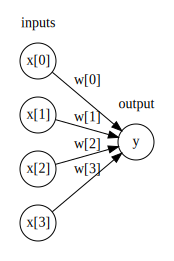

In [90]:
display(mglearn.plots.plot_logistic_regression_graph())

複雑なモデル分類が可能となるように中間処理ステップを表す「隠れユニット（hidden unit）」を導入する。

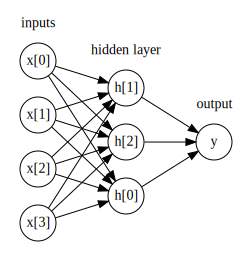

In [91]:
display(mglearn.plots.plot_single_hidden_layer_graph())

活性化関数の導入
1. 正則化線形関数（rectified liner unit:relu）
2. 双曲正接関数（hyperbolic tangent:tanh）
3. ジグモイド関数

上述のニューラルネットワークで活性化関数にtanhを使用した場合の回帰式は

$h[0] = \tanh (w[0,0] * x[0] + w[1,0] * x[1]  + w[2,0] * x[2] + w[3,0] * x[3] + b[0] )$<br>
$h[1] = \tanh (w[0,1] * x[0] + w[1,1] * x[1]  + w[2,1] * x[2] + w[3,1] * x[3] + b[1] )$<br>
$h[2] = \tanh (w[0,2] * x[0] + w[1,2] * x[1]  + w[2,2] * x[2] + w[3,2] * x[3] + b[2] )$<br>
$y = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b$

Text(0,0.5,'relu(x), tanh(x)')

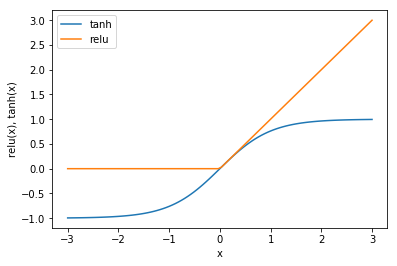

In [92]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

隠れ層の数は何層でも追加することができる。一般的には、隠れ層が３層以上あると「ディープラーニング」と呼ばれる。

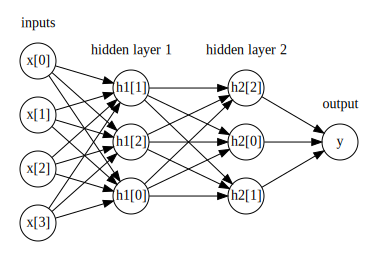

In [93]:
mglearn.plots.plot_two_hidden_layer_graph()

#### 2.3.8.2　ニューラルネットワークのチューニング
実際にsketch-learnのニューラルネットワークのパッケージであるMLPClassifierでのシミュレーションを実施する。<br>
デフォルトでは中間層のユニットが100個となり、活性化関数は「relu」である。

Text(0,0.5,'Feature 1')

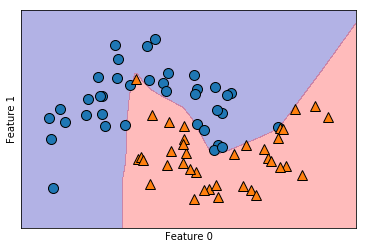

In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

サンプル数が少ないため、中間層のユニットを10個にしたとしても同様の結果が得られる。

Text(0,0.5,'Feature 1')

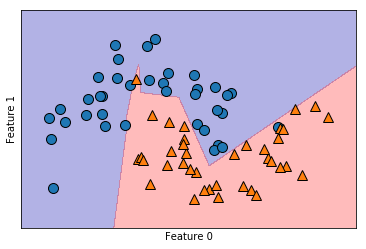

In [95]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

中間層を2層にし、それそれ10ユニットにした場合の結果は、決定境界が滑らかとなる。

Text(0,0.5,'Feature 1')

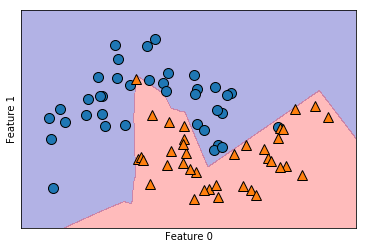

In [96]:
# それぞれ10ユニットの隠れ層を２層使う
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

中間層を2層にし、それそれ10ユニットにした上で、活性化関数にtanhを使用する。

Text(0,0.5,'Feature 1')

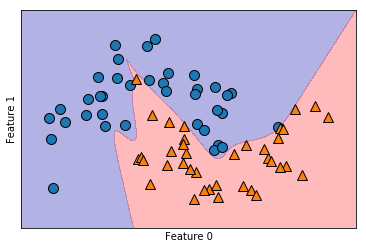

In [97]:
# それぞれ10ユニットの隠れ層ｗ２層使う。さたに非線形活性化関数にtanhを使う。
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

ニューラルネットワークの複雑さを、リッジ回帰や線形クラス分類器で行ったのと同様に、l2ペナルティで重みを０に近づけることで、制御することができる。このパラメータはalphaで、デフォルトでは非常に小さい値に設定されている。
alphaを変化させた場合の、効果を以下の図表で示す。

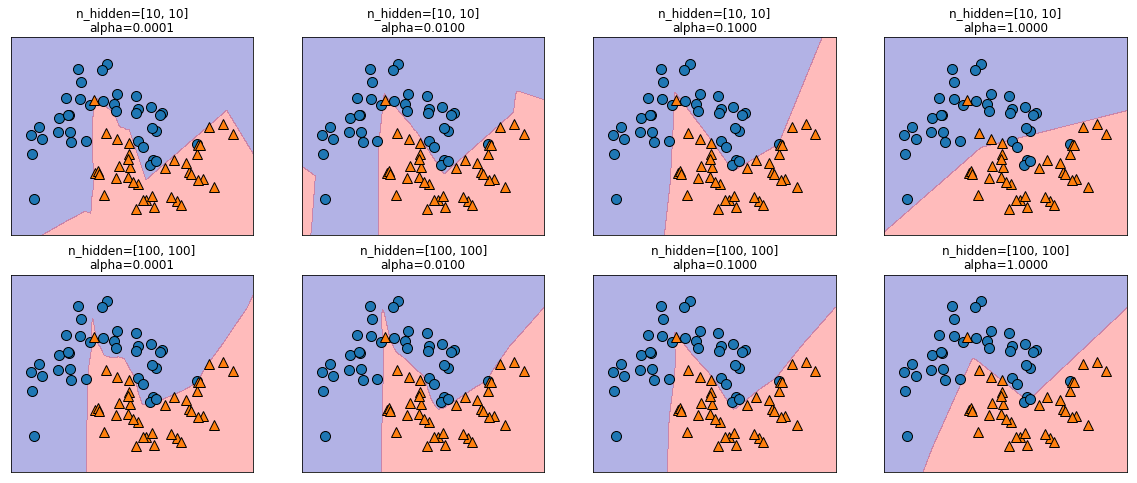

In [98]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

ニューラルネットワークは学習を開始する前に重みを乱数で割り当てる。この乱数による初期化の影響が、学習されるモデルに影響を与えることは、ニューラルネットワークの重要な性質の一つである。（MCMCとかと同じですねーーー）

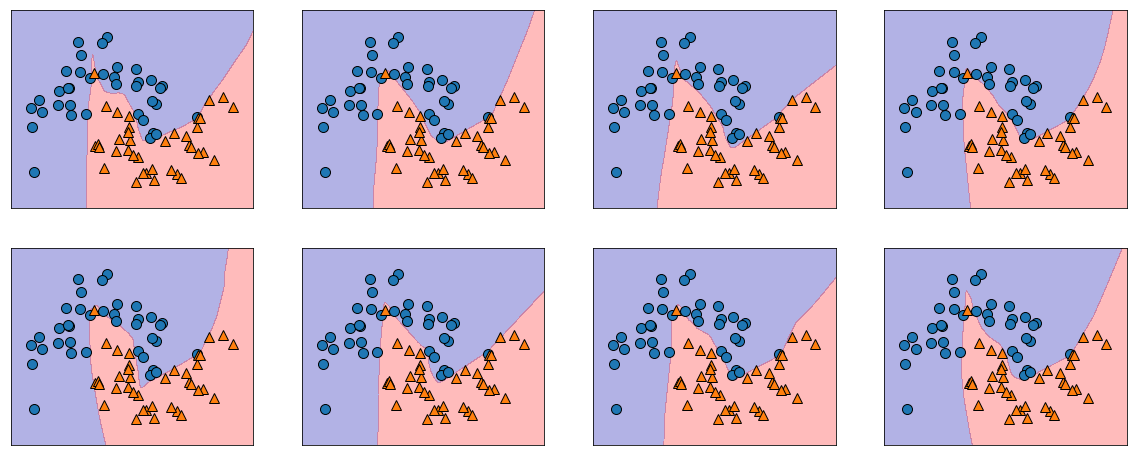

In [99]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

実データに対するニューラルネットワークを理解するために、cancerデータセットに対して適用する。
結果を見ると、訓練データセットに対する正答率が91％であり、テストデータセットに対するデータセットに対する正答率が88％であり、他のモデルよりも優れているとは言えない。これも、データセットのスケールが異なるためである。

In [100]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


データセットをスケール変換して、ニューラルネットワークを使用した結果を以下に示す。
正答率がかなり改善するが、学習の繰り返し回数が足りないとのエラーメッセージがでる。

In [102]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


C:\Users\yone\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


繰り返し回数を増やすと、訓練データセットに対する性能が上がっただけで、汎化能力は上がっていない。<br>
訓練データセットとテストデータセットの正答率に差があるということは、モデルの複雑差を下げれば、汎化能力が上がる可能性があることを意味する。

In [103]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


alphaパラメータを0.0001から１に引き上げて、ニューラルネットワークを使用する。

In [104]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


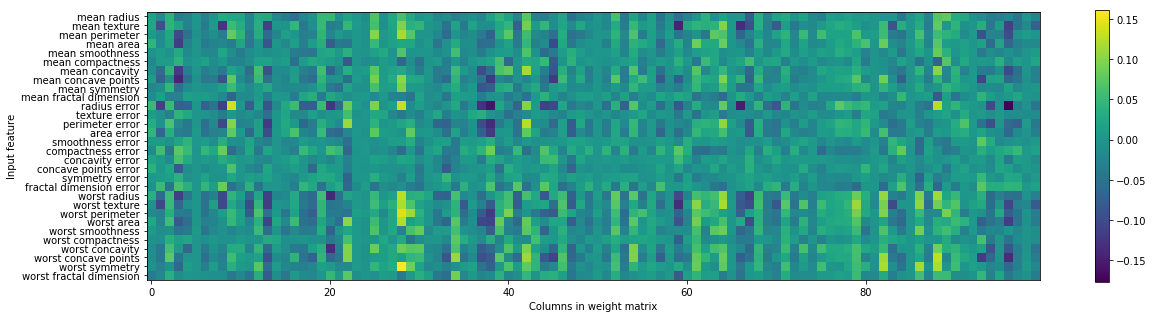

In [105]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### 2.3.8.3 長所、短所
1. 長所
大量のデータに含まれているデータを費やし、複雑なモデルを構築できること。
2. 短所
訓練に時間がかかる。またデータの前処理が必要となり、パラメータのチューニングが非常に難しい。

### 2.4 クラス分類器の不確実性推定
あるテストポイントに対して、クラス分類器が出力する予測クラスだけでなく、その予測がどれくらい確かなのか確認することができる。
クラス分類器の不確実性推定に利用できる関数が２つある。
1. 決定関数　Dicision function
2. predict proba

両方の不確実性推定を実装している勾配ブースティング法でシミュレーションする。

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

#### 2.4.1 決定関数（Decition function)


In [107]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
      gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


決定関数の符号だけみれば、予測クラスが分かる。

In [108]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [109]:
print("Thresholded decision function:\n{}".format(
    gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [110]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(
    np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [111]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


簡単な２次元データセットに対する勾配ブースティングモデルの決定境界（左下）と決定関数（右下）

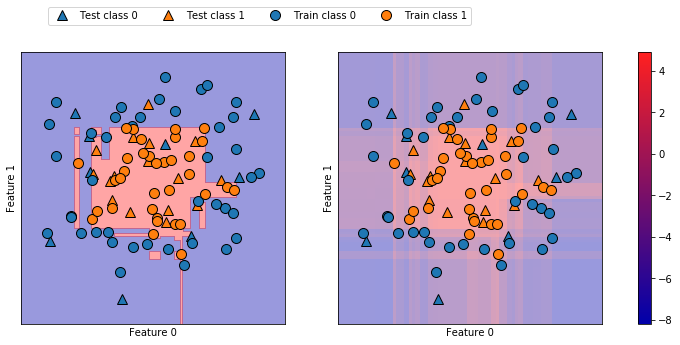

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

#### 2.4.2 確率の予測
出力される結果は、それぞれのクラスに属する確率である。

In [113]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [114]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(
    gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


勾配ブースティングモデルの決定境界（左下）とクラス１に分類される予測確率（右下）を示す。

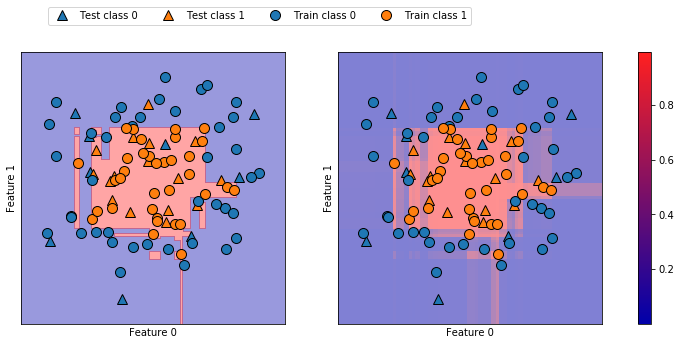

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

![classifier_comparison](images/classifier_comparison.png)

#### 2.4.3 多クラス分類の不確実性
上述してきたクラス分類の不確実性は、２つのクラスについてのみの分類であったが、多クラスについても応用できる。

In [116]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

各列は個々のクラスに対する「確信度スコア」で、大きいとそのクラスである可能性が高く、小さくなると可能性が低くなる。
各データポイントに対して、各進度スコアが最大になるクラスを選ぶことで予測クラスが得られる。

In [117]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [118]:
print("Argmax of decision function:\n{}".format(
    np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [119]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
Sums: [1. 1. 1. 1. 1. 1.]


In [120]:
print("Argmax of predicted probabilities:\n{}".format(
    np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
